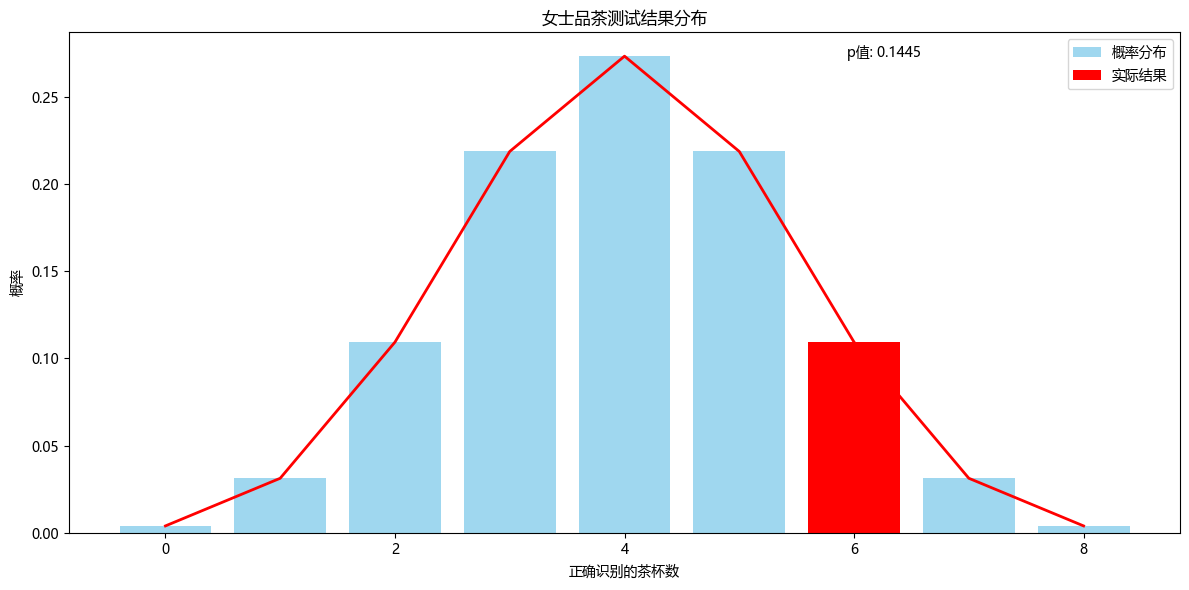

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 设置参数
n_tests = 8  # 总共的测试次数
n_correct = 6  # 正确识别的次数
p_random = 0.5  # 随机猜测的概率

# 计算正确次数的概率分布
x = np.arange(0, n_tests + 1)
pmf = binom.pmf(x, n_tests, p_random)

# 计算p值
p_value = 1 - binom.cdf(n_correct - 1, n_tests, p_random)

# 创建图表
plt.figure(figsize=(12, 6))

# 绘制概率分布
plt.bar(x, pmf, alpha=0.8, color='skyblue', label='概率分布')
plt.plot(x, pmf, 'r-', lw=2)

# 标记实际结果
plt.bar(n_correct, pmf[n_correct], alpha=1, color='red', label='实际结果')

# 添加标签和标题
plt.xlabel('正确识别的茶杯数')
plt.ylabel('概率')
plt.title('女士品茶测试结果分布')
plt.legend()

# 添加p值注释
plt.text(0.7, 0.95, f'p值: {p_value:.4f}', transform=plt.gca().transAxes)

# 显示图表
plt.tight_layout()
plt.show()

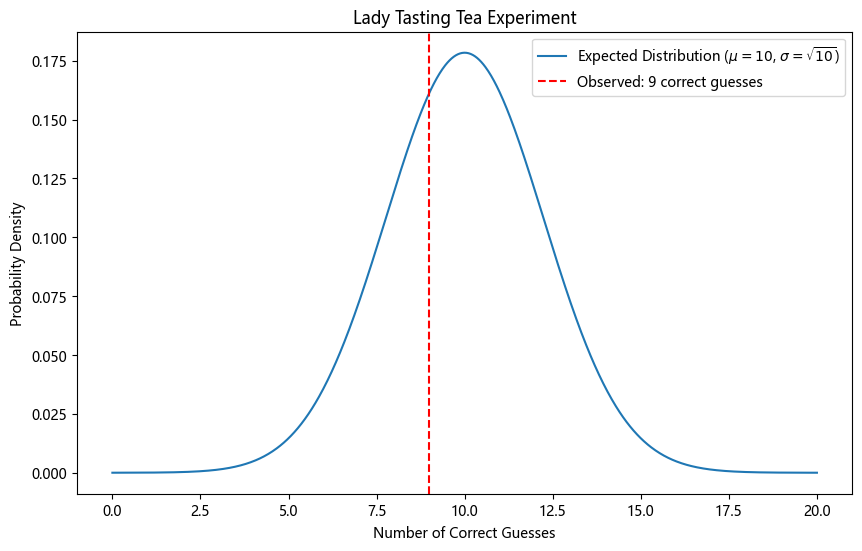

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 假设女士品尝了20杯茶
n = 20

# 女士正确猜测的次数（模拟）
correct_guesses = np.random.binomial(n, 0.5)  # 假设随机猜测，正确概率为0.5

# 计算P值，假设女士随机猜测，观察到至少这么多正确猜测的概率
p_value = 1 - norm.cdf(correct_guesses, n/2, np.sqrt(n/4))

# 绘制正态分布图
x = np.linspace(0, n, 1000)
y = norm.pdf(x, n/2, np.sqrt(n/4))

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Expected Distribution ($\mu=10$, $\sigma=\sqrt{10}$)')

# 绘制女士正确猜测的次数
plt.axvline(correct_guesses, color='r', linestyle='--', label=f'Observed: {correct_guesses} correct guesses')

# 显著性水平
alpha = 0.05
z_scores = np.arange(5, n+1)
p_values = 1 - norm.cdf(z_scores, n/2, np.sqrt(n/4))

# 绘制显著性水平线
for score in z_scores:
    if p_value < alpha:
        plt.axvline(score, color='g', linestyle='-', label=f'Significant at {alpha} level')

plt.legend()
plt.title('Lady Tasting Tea Experiment')
plt.xlabel('Number of Correct Guesses')
plt.ylabel('Probability Density')
plt.show()